# Import necessary libraries

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error , r2_score

# Importing Dataset

In [35]:
data=pd.read_csv('C:\\Users\\rajpu\\Downloads\\advertising.csv')

# Let's take a lookat the first few rows of the dataset

In [36]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


# Data Preprocessing

# Check for Null values

In [37]:
data.isnull().values.any()

False

In [38]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

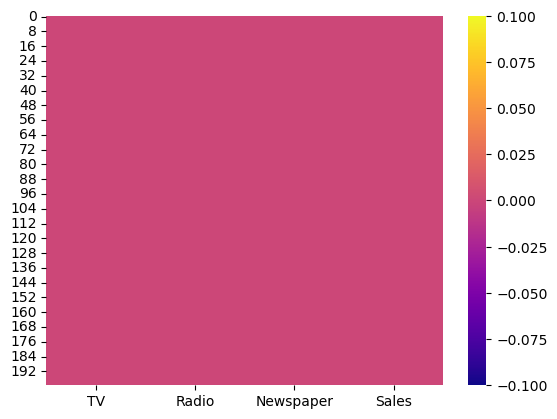

In [39]:
sns.heatmap(data.isnull(),cmap='plasma')

# Feature Engineering : Adding Interaction Term

In [40]:
data['TV_Radio']=data['TV']*data['Radio']
data['TV_Newspaper']=data['TV']*data['Newspaper']
data['Radio_Newspaper']=data['Radio']*data['Newspaper']

# Define features and target variable

In [41]:
X= data[['TV','Radio','Newspaper','TV_Radio','TV_Newspaper','Radio_Newspaper']]
y= data['Sales']

# Split the data into traning and testing sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

# Standardize the data

In [43]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Linear Regression

In [44]:
linear_model=LinearRegression()
linear_model.fit(X_train ,y_train)
y_pred_linear=linear_model.predict(X_test)
mse_linear= mean_squared_error(y_test, y_pred_linear)
r2_linear= r2_score(y_test , y_pred_linear)

# Ridge Regression with Hyperparameter Tuning

In [46]:
ridge =Ridge()
params= {'alpha': [0.1,0.1,0.1,100.0]}
grid_ridge=GridSearchCV(ridge,params, cv=5)
grid_ridge.fit(X_train ,y_train)
y_pred_ridge=grid_ridge.predict(X_test)
mse_ridge= mean_squared_error(y_test, y_pred_ridge)
r2_ridge= r2_score(y_test , y_pred_ridge)

# Random Forest Regression with Hyperparameter Tuning

In [49]:
rf=RandomForestRegressor(random_state=42)
params_rf= {'n_estimators': [50,100,200],'max_depth': [None,10,20,30]}
grid_rf=GridSearchCV(rf,params_rf, cv=5)
grid_rf.fit(X_train ,y_train)
y_pred_rf=grid_rf.predict(X_test)
mse_rf= mean_squared_error(y_test, y_pred_rf)
r2_rf= r2_score(y_test , y_pred_rf)

# Print the results

In [50]:
print(f'Linear Regression MSE: {mse_linear}, R^2:{r2_linear}')

Linear Regression MSE: 2.337596061234953, R^2:0.9243523349901799


In [51]:
print(f'Ridge Regression MSE: {mse_ridge}, R^2:{r2_ridge}')

Ridge Regression MSE: 2.337276221445104, R^2:0.9243626854239783


In [52]:
print(f'rf Regression MSE: {mse_rf}, R^2:{r2_rf}')

rf Regression MSE: 1.2472452386023067, R^2:0.9596375132729156


#  Visualization of Actual vs Predicted

In [53]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

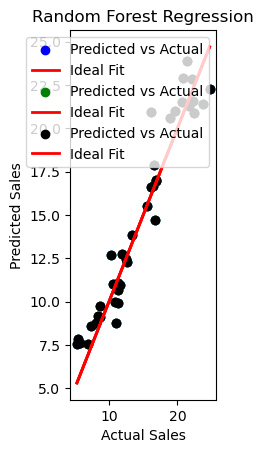

In [59]:
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_linear,color='green',label='Predicted vs Actual')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=2,label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression')
plt.legend()
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_linear,color='black',label='Predicted vs Actual')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linewidth=2,label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest Regression')
plt.legend()